# Type II Diabetes detection using DL

Import necessary libraris

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data viz. and EDA
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

## For scaling data 
from mlxtend.preprocessing import minmax_scaling 

# Tensorflow 
import tensorflow as tf
from sklearn.preprocessing import minmax_scale
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import  plot_model
from keras import metrics
from sklearn.metrics import roc_curve
import seaborn as sns

Read dataset


In [3]:
dt = pd.read_csv("uci_diabetes_data.csv")

***Exploritory Data analysis***

In [4]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dt.isnull().sum() #For checking if there are null columns/ values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we can see 9 columns where 'Outcome' specifies whether the person is diabetic or not.
Its great to see that there is no null element present. Thus we do not need to fill or drop empty cells. However on close inspection I found that there are many '0' values that doesn't make anysense. So we are considering them as null values.

In [6]:
dt.shape # 768 rows of data with 9 columns. 8 input columns & 1 output column

(768, 9)

In [7]:
dt['Outcome'].unique()

array([1, 0], dtype=int64)

As, we can see, we have only 2 class classification: patient with 1 have diabetes and patient with 0 are healhy. so this is a binary class classification. 

<AxesSubplot:ylabel='Outcome'>

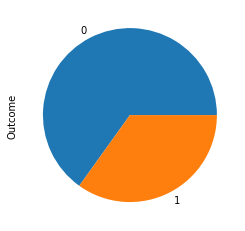

In [8]:
pd.value_counts(dt['Outcome']).plot.pie()

<AxesSubplot:>

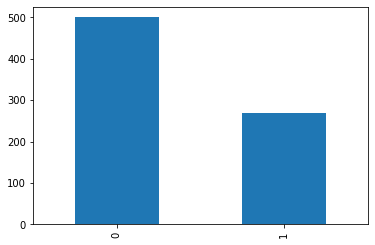

In [9]:
pd.value_counts(dt['Outcome']).plot.bar()

In [10]:
pd.value_counts(dt['Outcome'])

0    500
1    268
Name: Outcome, dtype: int64

As seen earlier there is no null value. However on close inspection we find that null values are filled with '0'

In [11]:
dt[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = dt[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)  

In [12]:
dt.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

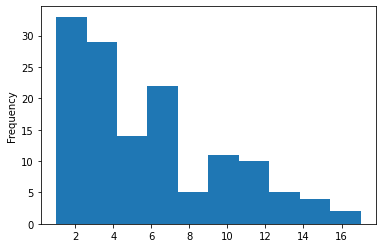

In [13]:
pd.value_counts(dt['Glucose']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

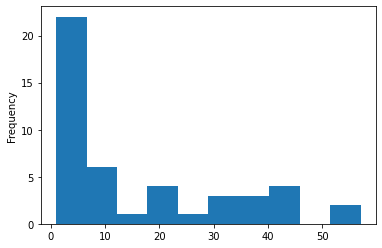

In [14]:
pd.value_counts(dt['BloodPressure']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

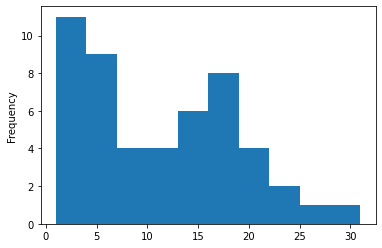

In [15]:
pd.value_counts(dt['SkinThickness']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

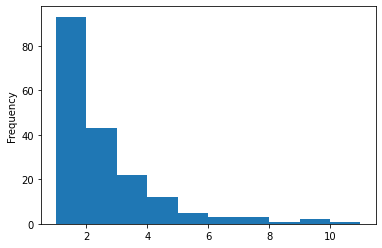

In [16]:
pd.value_counts(dt['Insulin']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

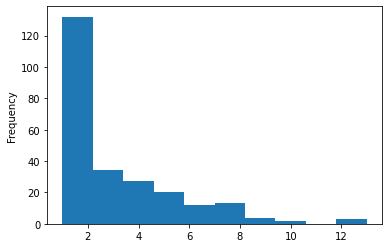

In [17]:
pd.value_counts(dt['BMI']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

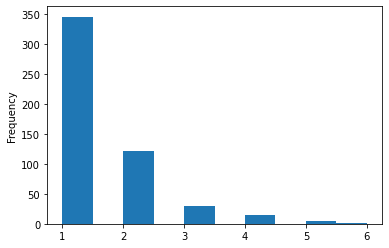

In [18]:
pd.value_counts(dt['DiabetesPedigreeFunction']).plot.hist()

<AxesSubplot:ylabel='Frequency'>

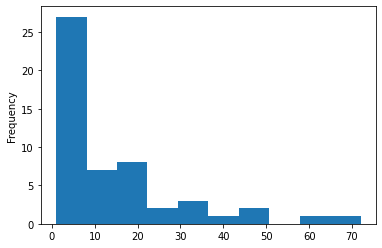

In [19]:
pd.value_counts(dt['Age']).plot.hist()

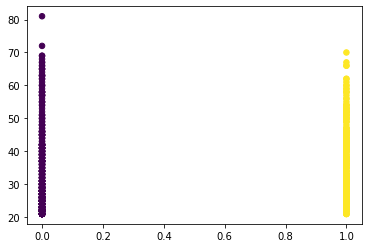

In [20]:
plt.scatter(dt.Outcome, dt.Age
, s=30, c= dt.Outcome )

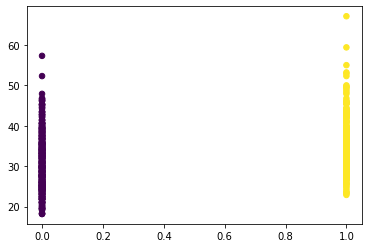

In [21]:
plt.scatter(dt.Outcome, dt.BMI
, s=30, c= dt.Outcome )

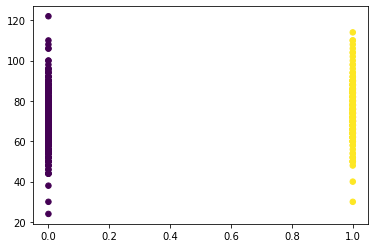

In [22]:
plt.scatter(dt.Outcome, dt.BloodPressure
, s=30, c= dt.Outcome )

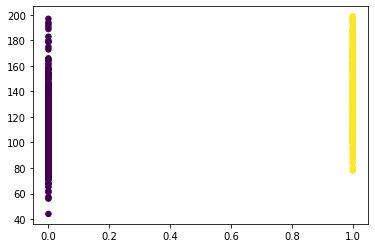

In [23]:
plt.scatter(dt.Outcome, dt.Glucose
, s=30, c= dt.Outcome )

In [24]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((dataset.isnull().sum())/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

In [25]:
missing_plot(dt,'Outcome')

Lets first fill null values and then find relations.

In [26]:
def correlation_plot():
    #correlation
    correlation = dt.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    #fig.write_image("Correlaion.pdf")
    py.iplot(fig)

In [30]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


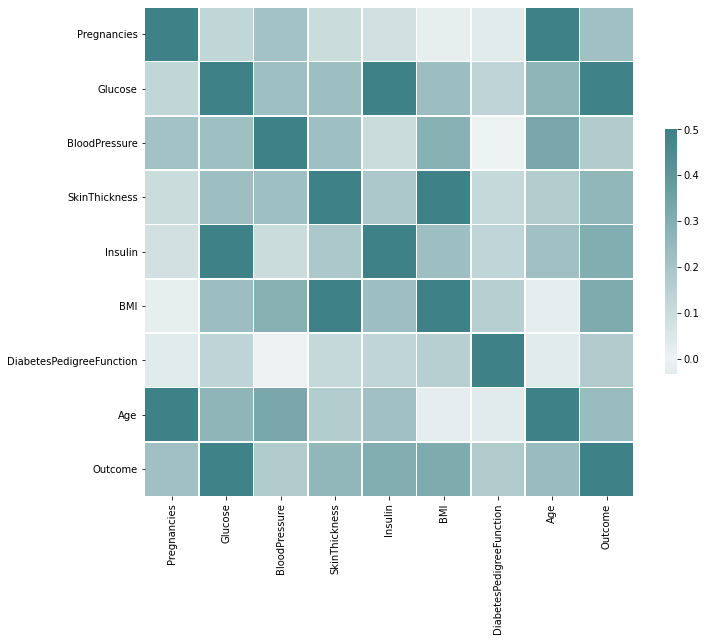

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 200, as_cmap=True)
sns.heatmap(correlation, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("Correlation.pdf", dpi=400)

In [ ]:
def median_target(var):   
    temp = dt[dt[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = dt[data_select]
    tmp2 = dt[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

Insulin : 2-Hour serum insulin (mu U/ml)

In [ ]:
median_target('Insulin')

In [ ]:
dt.loc[(dt['Outcome'] == 0 ) & (dt['Insulin'].isnull()), 'Insulin'] = 102.5
dt.loc[(dt['Outcome'] == 1 ) & (dt['Insulin'].isnull()), 'Insulin'] = 169.5

Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

In [ ]:
median_target('Glucose')

In [ ]:
dt.loc[(dt['Outcome'] == 0 ) & (dt['Glucose'].isnull()), 'Glucose'] = 107
dt.loc[(dt['Outcome'] == 1 ) & (dt['Glucose'].isnull()), 'Glucose'] = 140

SkinThickness : Triceps skin fold thickness (mm)

In [ ]:
median_target('SkinThickness')

In [ ]:
dt.loc[(dt['Outcome'] == 0 ) & (dt['SkinThickness'].isnull()), 'SkinThickness'] = 27
dt.loc[(dt['Outcome'] == 1 ) & (dt['SkinThickness'].isnull()), 'SkinThickness'] = 32

BloodPressure : Diastolic blood pressure (mm Hg)

In [ ]:
median_target('BloodPressure')

In [ ]:
dt.loc[(dt['Outcome'] == 0 ) & (dt['BloodPressure'].isnull()), 'BloodPressure'] = 70
dt.loc[(dt['Outcome'] == 1 ) & (dt['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

BMI : Body mass index (weight in kg/(height in m)^2)

In [ ]:
median_target('BMI')

In [ ]:
dt.loc[(dt['Outcome'] == 0 ) & (dt['BMI'].isnull()), 'BMI'] = 30.1
dt.loc[(dt['Outcome'] == 1 ) & (dt['BMI'].isnull()), 'BMI'] = 34.3

Age : Age (years)

DiabetesPedigreeFunction : Diabetes pedigree function

Pregnancies : Number of times pregnant

In [ ]:
missing_plot(dt, 'Outcome')

In [ ]:
dt.isnull().sum()

***PLOt functions***

In [ ]:
def plot_feat1_feat2(feat1, feat2) :  
    D = dt[(dt['Outcome'] != 0)]
    H = dt[(dt['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = dt[feat1],
        y = dt[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [ ]:
def barplot(var_select, sub) :
    tmp1 = dt[(dt['Outcome'] != 0)]
    tmp2 = dt[(dt['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(dt[var_select],dt['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [ ]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = dt[(dt['Outcome'] != 0)]
    H = dt[(dt['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [ ]:
plot_feat1_feat2('Glucose','Age')

In [ ]:
import seaborn as sns

In [ ]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = dt['Glucose'], y = dt['Age'], hue = "Outcome",
                    data = dt, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

# Model

In [ ]:
# Def X and Y
X = dt.drop('Outcome', 1)
y = dt['Outcome']

# 5.4. Model Performance

To measure the performance of a model, we need several elements :

This part is essential

Confusion matrix : also known as the error matrix, allows visualization of the performance of an algorithm :

true positive (TP) : Diabetic correctly identified as diabetic
true negative (TN) : Healthy correctly identified as healthy
false positive (FP) : Healthy incorrectly identified as diabetic
false negative (FN) : Diabetic incorrectly identified as healthy


Metrics :

Accuracy : (TP +TN) / (TP + TN + FP +FN)
Precision : TP / (TP + FP)
Recall : TP / (TP + FN)
F1 score : 2 x ((Precision x Recall) / (Precision + Recall))
Roc Curve : The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.



Precision Recall Curve : shows the tradeoff between precision and recall for different threshold

In [ ]:
x = minmax_scaling(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [ ]:
#early_stopping_callback = keras.callbacks.EarlyStopping(monitor="loss", patience=30)

checkpoint_filepath = "./model/model"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
)

In [ ]:
callbacks = [model_checkpoint_callback]

In [ ]:
def build_model_mod(a):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(a.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.01)
    optimizer1 = tf.keras.optimizers.Adam(0.01)
    optimizer2 = tf.keras.optimizers.Ftrl(0.01)
    
    
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer1, metrics=['accuracy', 'AUC', 'Precision', 'Recall', ])
    return model

In [ ]:
model_mod = build_model_mod(x)

In [ ]:
model_mod.summary()

In [ ]:
hist = model_mod.fit(x, y,epochs=100,callbacks=callbacks, validation_split=0.2, verbose=2)

In [ ]:
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
training_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['training_acc', 'test_acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show();

20/20 - 0s - loss: 0.0404 - accuracy: 0.9902 - auc: 0.9986 - precision: 0.9905 - recall: 0.9812 - 
                    val_loss: 1.1937 - val_accuracy: 0.9026 - val_auc: 0.9131 - val_precision: 0.8571 - val_recall: 0.8727

Epoch 59/100
20/20 - 0s - Train_loss: 0.0726 - Train_accuracy: 98.05 % - validation_loss: 0.8711 - validation_accuracy: 90.26%

In [ ]:
plot_model(model_mod, to_file='model_plot_Diabetes.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_mod = keras.models.load_model('diabetes_pred.h5')

In [ ]:
model_mod.load_weights(checkpoint_filepath)

In [ ]:
model_mod.save('diabetes_pred_26march.h5')

In [ ]:
"""
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

"""

In [ ]:
keras.metrics.confusion_matrix(y_test, y_pred)


In [ ]:
m = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    label_weights=None,
)

In [ ]:
tf.keras.metrics.Precision()


In [ ]:
true_positives

In [ ]:
m.result().sum()